# Nuveen Sales Data Analysis 

# Introduction 

Nuveen, a mutual fund company headquartered in Chicago, with major offices in New York City, Charlotte, San Francisco, London and secondary offices in Frankfurt, Los Angeles, Shanghai, Singapore, Rio de Janeiro, Vienna, Stockholm, Minneapolis, Montreal, Washington DC, Tokyo, Luxembourg, Madrid, Milan, Paris, and Miami. Nuveen is tasked with marketing and selling mutual funds through investment professionals such as brokers, financial planners, and financial advisors.

Nuveen charges investors a percent of assets under management (AUM). Therefore, the more they sell, and the longer it stays in their mutual funds, the more revenue they receive.Their goals are to acquire new clients cost-effectively, sell more to existing clients, reduce redemptions by acquiring, developing, and retaining (ADR).

**It is likely that Nuveen has a relatively small percent of clients that account for a high percentage of their profit?**
As a data analyst, given transactions data for 2018, I would like to assist the sales and marketing team to improving their targeting by predicting the probability of clients adding new funds in 2019.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-study-the-general-information" data-toc-modified-id="Step-1.-Open-the-data-file-and-study-the-general-information-1">Step 1. Open the data file and study the general information</a></span></li><li><span><a href="#Step2.-Preparing-the-Data" data-toc-modified-id="Step2.-Preparing-the-Data-2">Step2. Preparing the Data</a></span></li><li><span><a href="#Step3.-Model-and-Feature-Selection" data-toc-modified-id="Step3.-Model-and-Feature-Selection-3">Step3. Model and Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Fitting-Model-to-Select-Features" data-toc-modified-id="Fitting-Model-to-Select-Features-3.1">Fitting Model to Select Features</a></span></li><li><span><a href="#Fitting-the-Main-Model" data-toc-modified-id="Fitting-the-Main-Model-3.2">Fitting the Main Model</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-3.3">Prediction</a></span></li></ul></li><li><span><a href="#Step-4.-General-Conclusion" data-toc-modified-id="Step-4.-General-Conclusion-4">Step 4. General Conclusion</a></span></li></ul></div>

## Step 1. Open the data file and study the general information

Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scikitplot as skplt 
from IPython.display import display
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("ggplot")

data1=pd.read_excel("Transaction Data.xlsx")
data2=pd.read_excel("Transaction Data.xlsx", sheet_name=1)

Previewing first five rows of datasets

In [2]:
display(data1.head())
display(data2.head())

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31


,CONTACT_ID,sales_12M,new_Fund_added_12M,refresh_date
0,10761171685327323628,4484.20,NaN,2019-12-31
1,85102132684855362312,NaN,NaN,2019-12-31
2,85101122533782678327,128362.82,NaN,2019-12-31
3,4478952,160930.89,1.0,2019-12-31
4,85102153463467397715,NaN,NaN,2019-12-31


Merging datasets on primary key `CONTACT_ID`

In [3]:
data=pd.merge(data1,data2,on= "CONTACT_ID")
data.sample(5)

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_x,sales_12M_y,new_Fund_added_12M_y,refresh_date_y
5493,4391379,36.0,NaN,1.0,NaN,3.0,NaN,1.0,NaN,1.0,...,0.0,0.0,134062.86,0.00,0.0,0.0,2018-12-31,42028.61,NaN,2019-12-31
2008,10751182805306770880,24.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,0.0,14270.85,0.00,0.0,0.0,2018-12-31,355.63,NaN,2019-12-31
6135,85102152735782131565,1.0,6.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,...,0.0,0.0,-13502.59,0.00,0.0,0.0,2018-12-31,5545.89,1.0,2019-12-31
2785,4492552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,55698.35,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
8392,85202122433367940666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,313332.07,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31


Previewing general information of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CONTACT_ID                           10005 non-null  object        
 1   no_of_sales_12M_1                    4763 non-null   float64       
 2   no_of_Redemption_12M_1               5361 non-null   float64       
 3   no_of_sales_12M_10K                  2712 non-null   float64       
 4   no_of_Redemption_12M_10K             2976 non-null   float64       
 5   no_of_funds_sold_12M_1               4763 non-null   float64       
 6   no_of_funds_redeemed_12M_1           5361 non-null   float64       
 7   no_of_fund_sales_12M_10K             2712 non-null   float64       
 8   no_of_funds_Redemption_12M_10K       2976 non-null   float64       
 9   no_of_assetclass_sold_12M_1          4763 non-null   float64       
 10  no_of_asse

The general information shows all columns are in their required data types, however, column names are not in lowercase

Converting columns to lowercase.

In [5]:
data.columns=data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   contact_id                           10005 non-null  object        
 1   no_of_sales_12m_1                    4763 non-null   float64       
 2   no_of_redemption_12m_1               5361 non-null   float64       
 3   no_of_sales_12m_10k                  2712 non-null   float64       
 4   no_of_redemption_12m_10k             2976 non-null   float64       
 5   no_of_funds_sold_12m_1               4763 non-null   float64       
 6   no_of_funds_redeemed_12m_1           5361 non-null   float64       
 7   no_of_fund_sales_12m_10k             2712 non-null   float64       
 8   no_of_funds_redemption_12m_10k       2976 non-null   float64       
 9   no_of_assetclass_sold_12m_1          4763 non-null   float64       
 10  no_of_asse

Checking Missing values

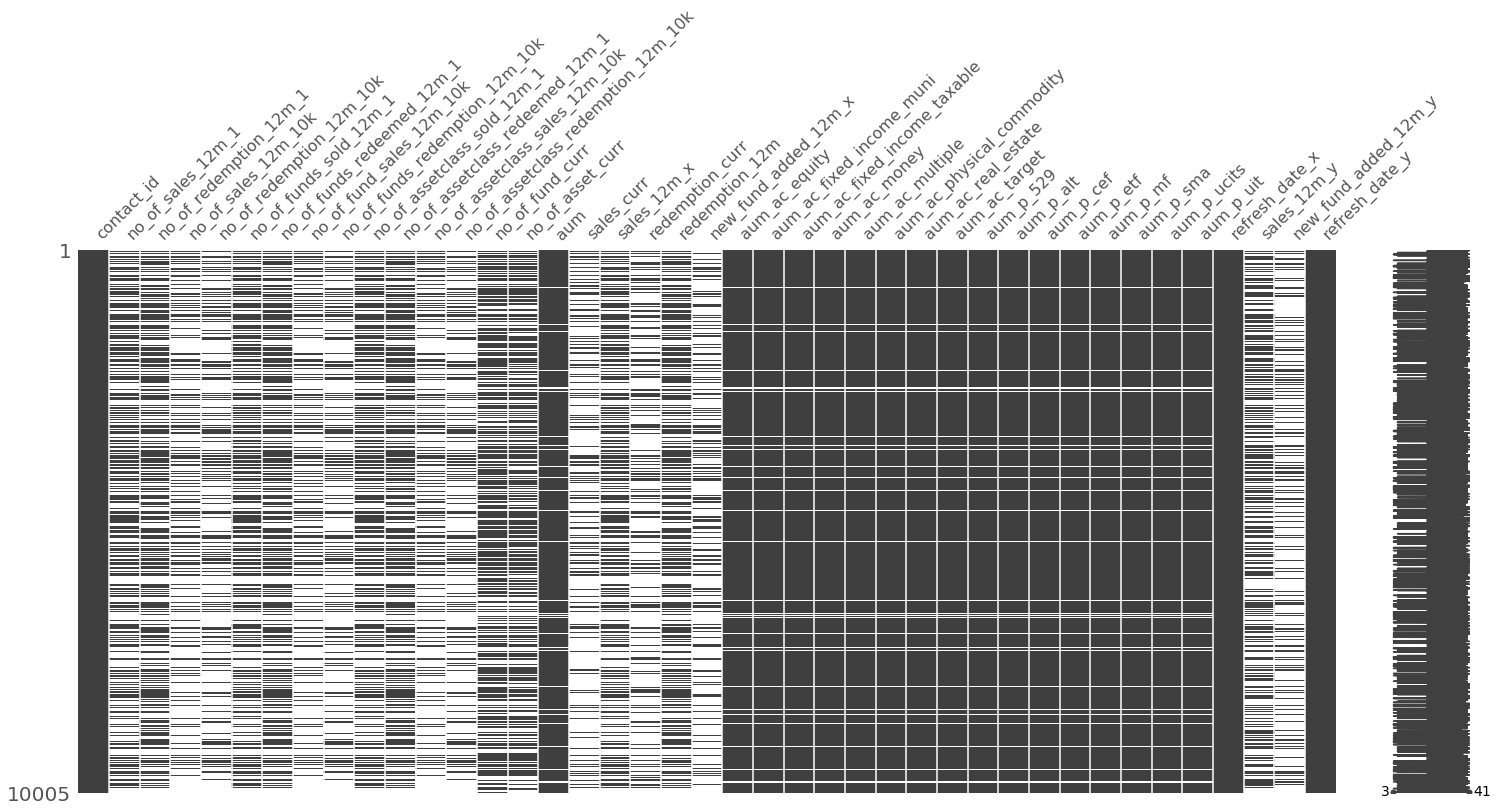

In [6]:
msno.matrix(data)
plt.show()

The matrix shows almost every column has a missing value and about half of the columns have enormous missing values

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_sales_12m_1,4763.0,42.183918,1.393746e+02,1.000000e+00,3.00000,9.0000,31.000000,4.395000e+03
no_of_redemption_12m_1,5361.0,39.147361,2.603290e+02,1.000000e+00,2.00000,7.0000,25.000000,1.215200e+04
no_of_sales_12m_10k,2712.0,8.928097,2.685996e+01,1.000000e+00,1.00000,3.0000,8.000000,9.860000e+02
no_of_redemption_12m_10k,2976.0,6.240927,2.181512e+01,1.000000e+00,1.00000,2.0000,5.000000,8.830000e+02
no_of_funds_sold_12m_1,4763.0,2.856603,2.760839e+00,1.000000e+00,1.00000,2.0000,3.000000,3.200000e+01
no_of_funds_redeemed_12m_1,5361.0,2.882112,2.740434e+00,1.000000e+00,1.00000,2.0000,4.000000,3.300000e+01
no_of_fund_sales_12m_10k,2712.0,2.103982,1.816222e+00,1.000000e+00,1.00000,1.0000,2.000000,1.900000e+01
no_of_funds_redemption_12m_10k,2976.0,2.043683,1.809064e+00,1.000000e+00,1.00000,1.0000,2.000000,2.100000e+01
no_of_assetclass_sold_12m_1,4763.0,1.651480,8.316322e-01,1.000000e+00,1.00000,1.0000,2.000000,5.000000e+00
no_of_assetclass_redeemed_12m_1,5361.0,1.692222,8.459920e-01,1.000000e+00,1.00000,1.0000,2.000000,5.000000e+00


The data description shows a vast difference between the minimum and maximum values. A huge gap also exist between 
some 75th percentile values and maximum values. These show there are potential outliers in the data. The maximum values of `redemption_curr` and	`redemption_12m` are positive and many asset and sales columns have negative values.	

## Step2. Preparing the Data

Distribution of the data

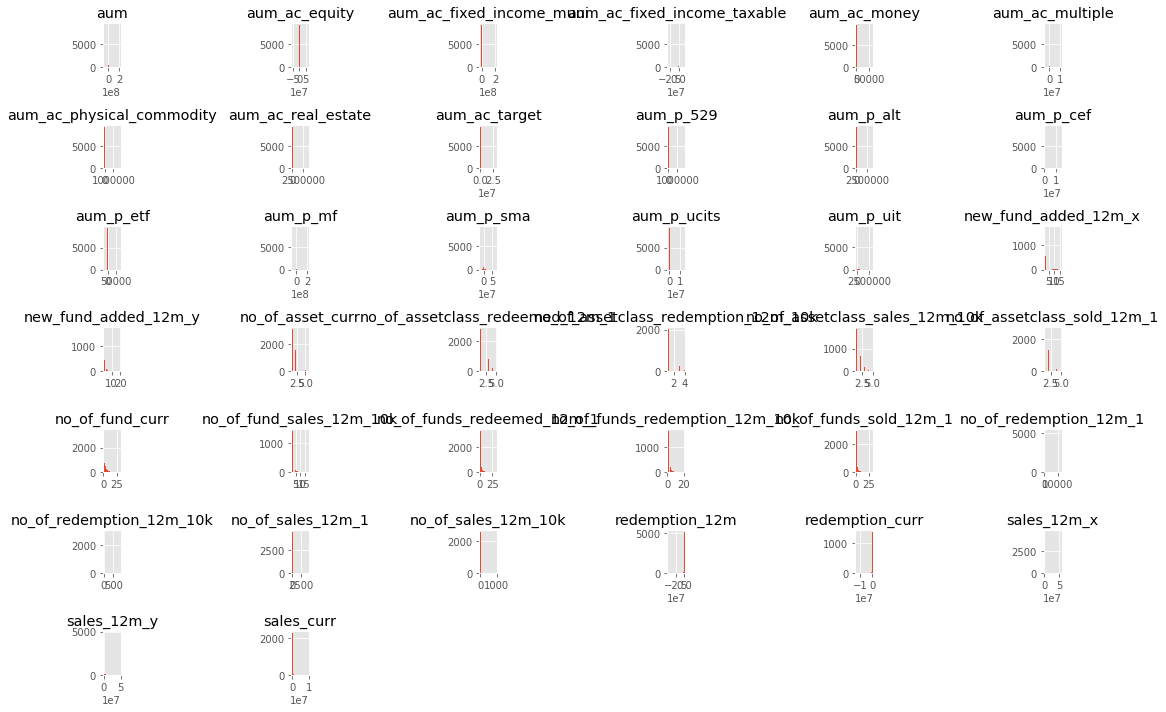

In [8]:
data.hist(figsize=(15,10), bins=30);
plt.tight_layout()

The histograms are not very clear but an obvious obeservation is that the data is highly skewed across columns.

Since there is a `contact_id` column that depicts unique IDs, it is necessary to check if there are duplicates.

In [9]:
data["contact_id"].duplicated().sum()

0

There are no duplicates in the data

**Dealing With Missing Values**

An instruction given by my project supervisor (Emeritus Institute of Management- PGDADS19 course leader) after consultation with a correspondent from Nuveen is to: 
- Fill floating point values `NaNs` with zero, 
- Redemptions can not be positive
- Sales and assets can not be negative. 

Therefore, redemptions must be at most zero, and sales and assets must be at least zero.

Filling `NaNs`with zero in dataframe

In [10]:
data.fillna(0, inplace=True)

Redemption can not be positive, hence ceiling values to be at most zero in a new DataFrame

In [11]:
cols = ["redemption_curr","redemption_12m"]
data_redemp=data[cols].mask(data[cols] >0, 0)
data_redemp.max()

redemption_curr    0.0
redemption_12m     0.0
dtype: float64

Filtering data without redemption columns

In [12]:
data_filter = [col for col in data.columns if not col.endswith(tuple(cols))]    
sales_asset_data = data[data_filter]
sales_asset_data.columns

Index(['contact_id', 'no_of_sales_12m_1', 'no_of_redemption_12m_1',
       'no_of_sales_12m_10k', 'no_of_redemption_12m_10k',
       'no_of_funds_sold_12m_1', 'no_of_funds_redeemed_12m_1',
       'no_of_fund_sales_12m_10k', 'no_of_funds_redemption_12m_10k',
       'no_of_assetclass_sold_12m_1', 'no_of_assetclass_redeemed_12m_1',
       'no_of_assetclass_sales_12m_10k', 'no_of_assetclass_redemption_12m_10k',
       'no_of_fund_curr', 'no_of_asset_curr', 'aum', 'sales_curr',
       'sales_12m_x', 'new_fund_added_12m_x', 'aum_ac_equity',
       'aum_ac_fixed_income_muni', 'aum_ac_fixed_income_taxable',
       'aum_ac_money', 'aum_ac_multiple', 'aum_ac_physical_commodity',
       'aum_ac_real_estate', 'aum_ac_target', 'aum_p_529', 'aum_p_alt',
       'aum_p_cef', 'aum_p_etf', 'aum_p_mf', 'aum_p_sma', 'aum_p_ucits',
       'aum_p_uit', 'refresh_date_x', 'sales_12m_y', 'new_fund_added_12m_y',
       'refresh_date_y'],
      dtype='object')

Grabing numeric columns in the `sales_asset_data` dataframe to help put a floor on values to be at least zero.
I would also write a function to fill negattive values with 0

In [13]:
num_data =sales_asset_data.select_dtypes(exclude=['datetime','object'])

#Defining a function to convert negative values to zeros

def convert_neg_to_zero(df):
    """This function converts all negative values in numeric columns in a dataframe to zeros. It would help 
    to maintain non_negative sales and asset values"""
    
    numeric= df._get_numeric_data()
    numeric[numeric<0]=0
    return df
# Applying the function to the data
convert_neg_to_zero(num_data)

,no_of_sales_12m_1,no_of_redemption_12m_1,no_of_sales_12m_10k,no_of_redemption_12m_10k,no_of_funds_sold_12m_1,no_of_funds_redeemed_12m_1,no_of_fund_sales_12m_10k,no_of_funds_redemption_12m_10k,no_of_assetclass_sold_12m_1,no_of_assetclass_redeemed_12m_1,...,aum_p_529,aum_p_alt,aum_p_cef,aum_p_etf,aum_p_mf,aum_p_sma,aum_p_ucits,aum_p_uit,sales_12m_y,new_fund_added_12m_y
0,21.0,38.0,0.0,1.0,5.0,5.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,122866.040,114614.07,0.0,0.0,18633.105,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19629.000,0.00,0.0,0.0,0.000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1758.700,0.00,0.0,0.0,0.000,0.0
3,20.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,57943.000,0.00,0.0,0.0,93212.000,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,12.0,35.0,7.0,28.0,3.0,4.0,3.0,4.0,2.0,3.0,...,0.0,0.0,0.0,0.0,430089.060,0.00,0.0,0.0,914411.060,4.0
10001,85.0,64.0,1.0,0.0,7.0,4.0,1.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,170204.585,0.00,0.0,0.0,540906.000,4.0
10002,18.0,39.0,5.0,3.0,4.0,4.0,2.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,16516.080,0.00,0.0,0.0,122282.970,3.0
10003,34.0,51.0,5.0,8.0,16.0,20.0,3.0,8.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,207464.290,0.0


Combining ceiled and floored DataFrames

In [14]:
data_set=pd.concat([num_data,data_redemp],axis=1)
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_sales_12m_1,10005.0,20.082159,9.844041e+01,0.000000e+00,0.0000,0.000000,8.000000,4.395000e+03
no_of_redemption_12m_1,10005.0,20.976412,1.915516e+02,0.000000e+00,0.0000,1.000000,8.000000,1.215200e+04
no_of_sales_12m_10k,10005.0,2.420090,1.453480e+01,0.000000e+00,0.0000,0.000000,1.000000,9.860000e+02
no_of_redemption_12m_10k,10005.0,1.856372,1.223371e+01,0.000000e+00,0.0000,0.000000,1.000000,8.830000e+02
no_of_funds_sold_12m_1,10005.0,1.359920,2.379880e+00,0.000000e+00,0.0000,0.000000,2.000000,3.200000e+01
no_of_funds_redeemed_12m_1,10005.0,1.544328,2.467777e+00,0.000000e+00,0.0000,1.000000,2.000000,3.300000e+01
no_of_fund_sales_12m_10k,10005.0,0.570315,1.329914e+00,0.000000e+00,0.0000,0.000000,1.000000,1.900000e+01
no_of_funds_redemption_12m_10k,10005.0,0.607896,1.358727e+00,0.000000e+00,0.0000,0.000000,1.000000,2.100000e+01
no_of_assetclass_sold_12m_1,10005.0,0.786207,1.004772e+00,0.000000e+00,0.0000,0.000000,1.000000,5.000000e+00
no_of_assetclass_redeemed_12m_1,10005.0,0.906747,1.046786e+00,0.000000e+00,0.0000,1.000000,2.000000,5.000000e+00


There are no positive redemptions and no negative sales and assets in data

Remove rows that are all zeros; these records would not have any impact on the analysis as everthing is zero.

In [15]:
data_set= data_set[(data_set.T!= 0).any()]
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8408 entries, 0 to 10003
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12m_1                    8408 non-null   float64
 1   no_of_redemption_12m_1               8408 non-null   float64
 2   no_of_sales_12m_10k                  8408 non-null   float64
 3   no_of_redemption_12m_10k             8408 non-null   float64
 4   no_of_funds_sold_12m_1               8408 non-null   float64
 5   no_of_funds_redeemed_12m_1           8408 non-null   float64
 6   no_of_fund_sales_12m_10k             8408 non-null   float64
 7   no_of_funds_redemption_12m_10k       8408 non-null   float64
 8   no_of_assetclass_sold_12m_1          8408 non-null   float64
 9   no_of_assetclass_redeemed_12m_1      8408 non-null   float64
 10  no_of_assetclass_sales_12m_10k       8408 non-null   float64
 11  no_of_assetclass_redemption_1

Droping columns with very low  nonzero values (columns with less than 5% nonzero values), as they would not impact the analysis 

In [16]:
non_zeros=np.count_nonzero(data_set, axis=0)
non_zeros

array([4763, 5361, 2712, 2976, 4763, 5361, 2712, 2976, 4763, 5361, 2712,
       2976, 6183, 5579, 5016, 2425, 4757, 2695, 3572, 3462, 2353,    2,
       1009,  234,   35,  359,  261,   14,  581,   11, 4406, 1461,   35,
        208, 5070, 2521, 2572, 5373], dtype=int64)

In [17]:
df1=pd.Series(non_zeros,index=data_set.columns)
selected=df1[df1>0.05*data_set.shape[0]]
data_select = pd.DataFrame(data_set, columns=selected.index)
data_select.head()

,no_of_sales_12m_1,no_of_redemption_12m_1,no_of_sales_12m_10k,no_of_redemption_12m_10k,no_of_funds_sold_12m_1,no_of_funds_redeemed_12m_1,no_of_fund_sales_12m_10k,no_of_funds_redemption_12m_10k,no_of_assetclass_sold_12m_1,no_of_assetclass_redeemed_12m_1,...,aum_ac_fixed_income_muni,aum_ac_fixed_income_taxable,aum_ac_multiple,aum_p_cef,aum_p_mf,aum_p_sma,sales_12m_y,new_fund_added_12m_y,redemption_curr,redemption_12m
0,21.0,38.0,0.0,1.0,5.0,5.0,0.0,1.0,2.0,2.0,...,284737.930,84.5,0.0,0.0,122866.04,114614.07,18633.105,0.0,-1496.745,-102496.165
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19629.000,0.0,0.0,0.0,19629.00,0.00,0.000,0.0,0.000,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1758.700,0.0,0.0,0.0,1758.70,0.00,0.000,0.0,0.000,0.000
3,20.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.000,57943.0,0.0,0.0,57943.00,0.00,93212.000,1.0,0.000,0.000
5,71.0,55.0,20.0,4.0,7.0,7.0,6.0,4.0,2.0,2.0,...,667083.625,0.0,0.0,9550.0,255611.95,0.00,467693.045,0.0,-18231.645,-178484.290


Visualising data

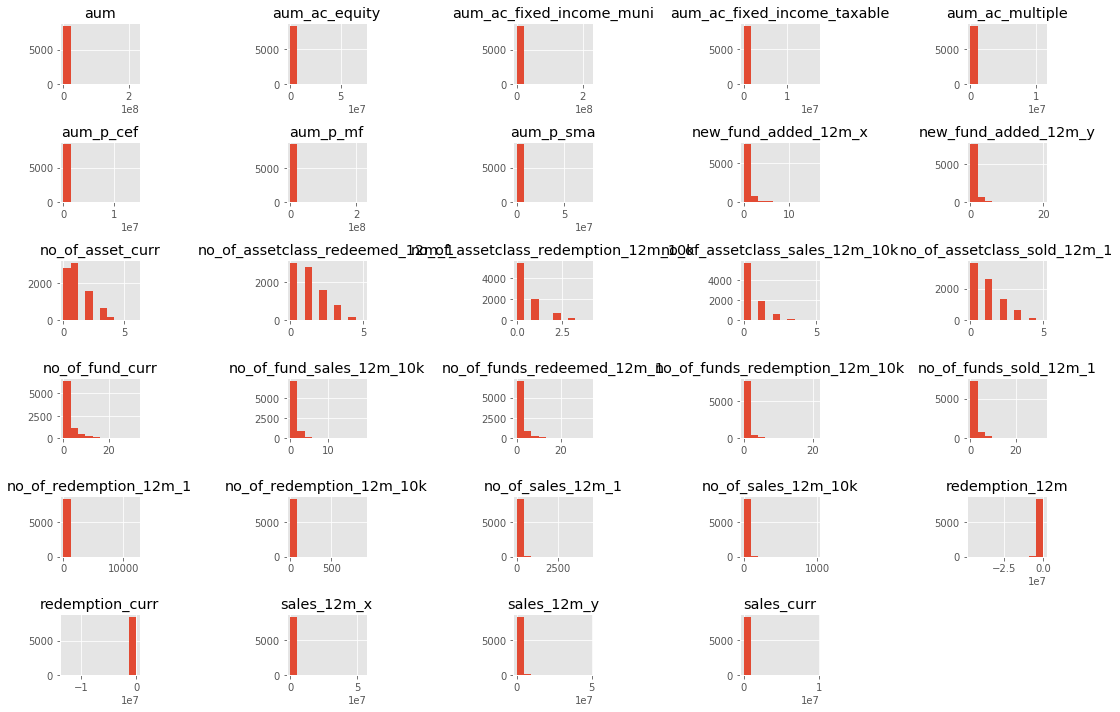

In [18]:
data_select.hist(figsize=(15,10));
plt.tight_layout()

Now the distributions are much clearer and show there exist much skewness in the data.

## Step3. Model and Feature Selection

Selecting features and target for Classification

In [19]:
features=data_select.drop(["new_fund_added_12m_y", "sales_12m_y"],axis=1 )
target=data_select.new_fund_added_12m_y

Converting target variable into binary

In [20]:
target=np.where(target==0,0,1)
target_fit=pd.DataFrame({"new_fund_added_12m_y":target}, index=data_select.index)
result=pd.Series.value_counts(target)
result

0    5887
1    2521
dtype: int64

The proprotion of zeros and ones show the data is imbalanced.

Importing libraries for cross validation

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

Rescaling the features to help normalise the range of features in the dataset

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_feat=pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

Cross Validation to choose the best model

In [23]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=LogisticRegression(), X=scaled_feat, y=target, cv=5)
accuracy1 = cross_val_score(estimator=RandomForestClassifier(), X=scaled_feat, y=target, cv=5)
accuracy2 = cross_val_score(estimator=SVC(), X=scaled_feat, y=target, cv=5)
accuracy3 = cross_val_score(estimator=xgb.XGBClassifier(), X=scaled_feat, y=target, cv=5)
accuracy4 = cross_val_score(estimator=GradientBoostingClassifier(), X=scaled_feat, y=target, cv=5)
accuracy5 = cross_val_score(estimator=HistGradientBoostingClassifier(), X=scaled_feat, y=target, cv=5)
r_mean=accuracy.mean()
r_std=accuracy.std()
r_mean1=accuracy1.mean()
r_std1=accuracy1.std()
r_mean2=accuracy2.mean()
r_std2=accuracy2.std()
r_mean3=accuracy3.mean()
r_std3=accuracy3.std()
r_mean4=accuracy4.mean()
r_std4=accuracy4.std()
r_mean5=accuracy5.mean()
r_std5=accuracy5.std()
output = "Mean accuracy for Logistic = {0:.2%},  Std = {1:.2f}\nMean accuracy for RandomForest = {2:.2%},  Std = {3:.2f}\n\
Mean accuracy for SVC = {4:.2%},  Std = {5:.2f}\nMean accuracy for XGB = {6:.2%},  Std = {7:.2f}\n\
Mean accuracy for GradientBoostingClassifier = {8:.2%},  Std = {9:.2f}\nMean accuracy for HistGradientBoostingClassifier = \
{10:.2%}, Std = {11:.2f}"
print(output.format(r_mean,r_std,r_mean1,r_std1,r_mean2,r_std2,r_mean3,r_std3,r_mean4,r_std4,r_mean5,r_std5))

Mean accuracy for Logistic = 70.55%,  Std = 0.00
Mean accuracy for RandomForest = 74.57%,  Std = 0.01
Mean accuracy for SVC = 70.34%,  Std = 0.00
Mean accuracy for XGB = 74.18%,  Std = 0.01
Mean accuracy for GradientBoostingClassifier = 74.70%,  Std = 0.01
Mean accuracy for HistGradientBoostingClassifier = 75.43%, Std = 0.01


The best model for the study is the HistGradientBoostingClassifier. Before fitting the model, I will do feature selection based on feature importance, i.e.`feature_importances_`. But HistGradientBoostingClassifier does  not yet have that feature. However, since it is Histogram-based `Gradient Boosting` Classification Tree, and GradientBoostingClassifier scored approximately the same mean accuracy, I will do feature selection with GradientBoostingClassifier. 

### Fitting Model to Select Features

Splitting data into training and testing, fitting the model, and selecting important features.

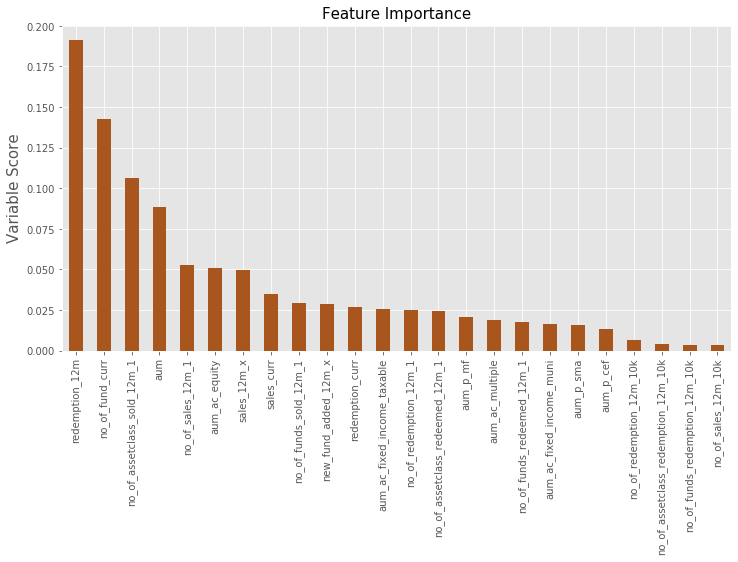

In [24]:
from sklearn.model_selection import train_test_split
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(scaled_feat, target_fit, test_size=.25, 
                                                   random_state=42)
model=GradientBoostingClassifier(random_state=42, learning_rate=0.1)
model.fit(X_train_feat, y_train_feat)
feat_importances = pd.Series(model.feature_importances_, index=X_train_feat.columns)
feat_importances.nlargest(24).plot(kind='bar',figsize=(12,6),color="xkcd:sienna")
plt.title("Feature Importance", fontdict={"size":15})
plt.ylabel('Variable Score', fontdict={"size":15})
plt.show()

Selecting features that have scores of at least approximately 0.025.

In [25]:
feat_select= pd.DataFrame(features, columns=feat_importances.nlargest(14).index)
feat_select.columns

Index(['redemption_12m', 'no_of_fund_curr', 'no_of_assetclass_sold_12m_1',
       'aum', 'no_of_sales_12m_1', 'aum_ac_equity', 'sales_12m_x',
       'sales_curr', 'no_of_funds_sold_12m_1', 'new_fund_added_12m_x',
       'redemption_curr', 'aum_ac_fixed_income_taxable',
       'no_of_redemption_12m_1', 'no_of_assetclass_redeemed_12m_1'],
      dtype='object')

Checcking presence of potential Multicolinearity among the selected features

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(feat_select)
vif_d=pd.DataFrame({"vif_new_fund_added":[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]}, 
              index=x.columns)
vif_d

,vif_new_fund_added
const,2.363765
redemption_12m,2.352122
no_of_fund_curr,2.229824
no_of_assetclass_sold_12m_1,3.656645
aum,2.348027
no_of_sales_12m_1,1.673494
aum_ac_equity,1.297550
sales_12m_x,3.705917
sales_curr,1.259858
no_of_funds_sold_12m_1,6.098043


Basing on the variance inflation factor (vif) Rule of Thumb, Multicollinerity would not be a problem in the model as vifs are all < 10. 

### Fitting the Main Model 

In [27]:
from imblearn.over_sampling import RandomOverSampler  # To deal with data imbalance
scaler= StandardScaler()
features=pd.DataFrame(scaler.fit_transform(feat_select), columns=feat_select.columns)
X_train, X_test, y_train, y_test = train_test_split(features, target_fit, test_size=.30, 
                                                   random_state=42)
ro = RandomOverSampler(random_state=101)
X_train1, y_train1= ro.fit_sample(X_train, y_train)

model1 =HistGradientBoostingClassifier( max_iter=82,random_state=42,min_samples_leaf=15,max_leaf_nodes=10,l2_regularization=0.04)
model1.fit(X_train1, y_train1)

HistGradientBoostingClassifier(l2_regularization=0.04, max_iter=82,
                               max_leaf_nodes=10, min_samples_leaf=15,
                               random_state=42)

### Prediction

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1776
           1       0.57      0.50      0.54       747

    accuracy                           0.74      2523
   macro avg       0.69      0.67      0.68      2523
weighted avg       0.73      0.74      0.74      2523



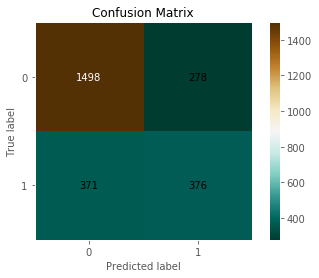

In [28]:
import scikitplot as skplt
from sklearn.metrics import classification_report
predtest=model1.predict_proba(X_test)[:,1]
predict = np.where(predtest >= 0.55, 1, 0)# adjusting threshold
skplt.metrics.plot_confusion_matrix(y_test,predict,cmap='BrBG_r')
print(classification_report(y_test,predict)) 

The model has an accurracy of 74%. Which indicates (376+1498), i.e. 1874 of 2523 of values were predicted right (accurately). About 84% of true zeros (0) were recalled, i.e. about 84% of true zeros were found. About 50% of true ones were found (recalled). About 80% of true zeros found were actually correct (precision), and about 57% of true ones found were correct. 

Of the 1776 zeros in the testing data, the model predicted 1498 of them rightly (True negative), and 278 wrongly (False positive). Of the 747 ones (1) in the testing dataset, 376 were correctly predicted as 1 ( True positive) and 371 were predicted wrongly (False Negative). On a whole, basing on the nature of the data, the model does well in prediction.

 Ploting cummnlative gains curve, and Lift Curve

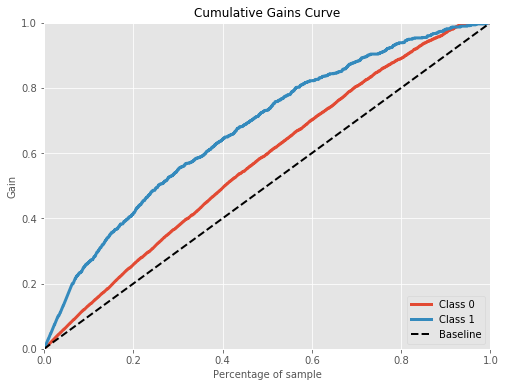

In [29]:
 import scikitplot as skplt

predicted_probabilities = model1.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities, figsize=(8,6))
plt.show()

When the sales and marketing team of Nuveen target top 40% of the sample, it would contain about 65% of clients adding new funds, i.e. they can improve sales of new funds at the maximum by targeting 40% of the sample.

In [ ]:
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities, figsize=(8,6))
plt.legend( loc = 'upper right')
plt.show()

When the sales and marketing team of Nuveen target top 40% of the sample, it would contain about 1.6 times  more clients adding new funds. 

## Step 4. General Conclusion

- The sales and marketing team of Nuveen should target top 40% of the sample, it would contain about 65% of clients adding new funds in the subsequent year. 
- Targeting top 40% of the sample would also contain about 1.6 times more clients adding new funds. 
- Pay special attention to clients in  the bottom 10% of the sample as they are not likely to add  new funds. 
- Nuveen should consider providing incentives to data collectors to improve data collection. The data had a lot 
of missing values. In addition, a lot of sales and assets were negative that had to be floored with zero, and few redemptions values had to be ceiled with zero.